In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ford = pd.read_csv("cars/ford.csv")
ford.insert(0, 'make', 'Ford')

vw = pd.read_csv("cars/vw.csv")
vw.insert(0, 'make', 'VW')

merc = pd.read_csv("cars/merc.csv")
merc.insert(0, 'make', 'Mercedes')

vauxhall = pd.read_csv("cars/vauxhall.csv")
vauxhall.insert(0, 'make', 'Vauxhall')

bmw = pd.read_csv("cars/bmw.csv")
bmw.insert(0, 'make', 'BMW')

audi = pd.read_csv("cars/audi.csv")
audi.insert(0, 'make', 'Audi')

toyota = pd.read_csv("cars/toyota.csv")
toyota.insert(0, 'make', 'Toyota')

skoda = pd.read_csv("cars/skoda.csv")
skoda.insert(0, 'make', 'Skoda')

hyundai = pd.read_csv("cars/hyundi.csv")
hyundai.insert(0, 'make', 'Hyundai')

cars = pd.concat([ford, vw, merc, vauxhall, bmw, audi, toyota, skoda, hyundai], axis=0)

In [3]:
cars['model'] = cars['model'].str.strip()
cars = cars[cars['year'] <= 2022]
cars['age'] = (2022 - cars['year'])
cars = cars.reset_index(drop=True)

In [4]:
cars.sample(n=10)

,make,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
87693,Toyota,Avensis,2016,8420,Manual,41257,Diesel,20,67.3,1.6,6
71019,Audi,Q3,2016,21995,Semi-Auto,40254,Petrol,205,40.4,2.0,6
13320,Ford,Fiesta,2017,11400,Semi-Auto,26942,Petrol,150,57.7,1.0,5
37901,Mercedes,A Class,2017,18981,Semi-Auto,13366,Petrol,145,52.3,1.6,5
81627,Toyota,Corolla,2019,21491,Automatic,3993,Hybrid,135,85.6,1.8,3
65605,BMW,2 Series,2017,16250,Semi-Auto,23374,Diesel,150,65.7,2.0,5
66442,BMW,4 Series,2018,26500,Semi-Auto,10305,Petrol,150,41.5,3.0,4
41016,Mercedes,V Class,2019,20950,Manual,35,Diesel,145,46.3,2.1,3
37451,Mercedes,GLA Class,2016,18640,Semi-Auto,20422,Diesel,125,56.5,2.1,6
43425,Mercedes,C Class,2017,15699,Automatic,33569,Petrol,125,53.3,2.0,5


In [5]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize,age
count,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000
mean,2017.087291,16805.451606,23058.594126,120.298984,55.166950,1.663283,4.912709
std,2.119570,9866.768844,21148.390071,63.150672,16.138556,0.557649,2.119570
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,2.000000
25%,2016.000000,9999.000000,7424.500000,125.000000,47.100000,1.200000,3.000000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000,5.000000
75%,2019.000000,20870.000000,32337.750000,145.000000,62.800000,2.000000,6.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,52.000000


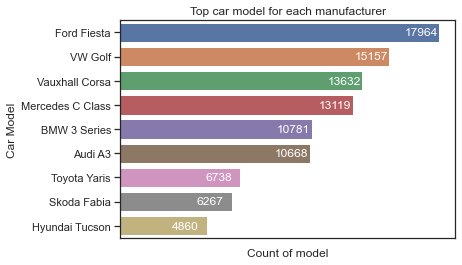

In [118]:
pop_c = cars.groupby('make')[['model']].agg(pd.Series.count)
pop_m = cars.groupby('make')[['model']].agg(pd.Series.mode)

popular = pd.merge(pop_m, pop_c, right_index=True, left_index=True)
popular.rename(columns={'model_x':'model', 'model_y':"count"}, inplace=True)
popular['full'] = popular.index + ' ' + popular['model']
popular = popular.sort_values(by='count', ascending=False)

g = sns.barplot(data=popular, x='count', y='full')
g.bar_label(g.containers[0], padding=-35, fontsize=12, color='white')
g.axes.xaxis.set_ticks([])

plt.title('Top car model for each manufacturer')
plt.xlabel('Count of model')
plt.ylabel('Car Model')
plt.show()

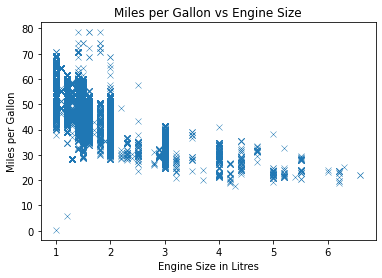

In [7]:
filt = cars[(cars['mpg'] < 80) & (cars['engineSize'] > 0)]
filt = filt[filt['fuelType'].isin(['Petrol', 'Deisel'])]
sns.scatterplot(data=filt, x='engineSize', y='mpg', marker='x')

plt.xlabel('Engine Size in Litres')
plt.ylabel('Miles per Gallon')
plt.title("Miles per Gallon vs Engine Size")
plt.show()

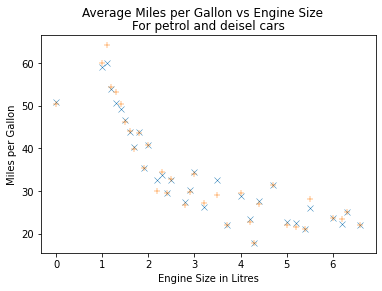

In [8]:
filt = cars[cars['fuelType'].isin(['Petrol', 'Deisel'])]
mean_mpg = filt.groupby('engineSize')[['engineSize', 'mpg']].mean()
med_mpg = filt.groupby('engineSize')[['engineSize', 'mpg']].median()#.agg(pd.Series.mode)

sns.scatterplot(data=mean_mpg, x='engineSize', y='mpg', marker='x')
sns.scatterplot(data=med_mpg, x='engineSize', y='mpg', marker='+')

plt.xlabel('Engine Size in Litres')
plt.ylabel('Miles per Gallon')
plt.suptitle("Average Miles per Gallon vs Engine Size")
plt.title("For petrol and deisel cars")
plt.show()

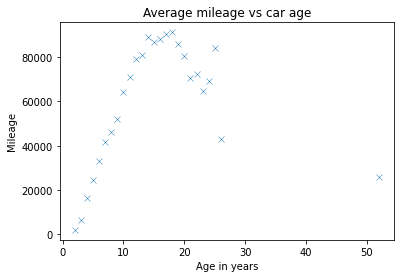

In [9]:
filt = cars.groupby('age')[['age', 'mileage']].mean()

sns.scatterplot(data=filt, x='age', y='mileage', marker='x')
plt.ylabel("Mileage")
plt.xlabel('Age in years')
plt.title('Average mileage vs car age')
plt.show()

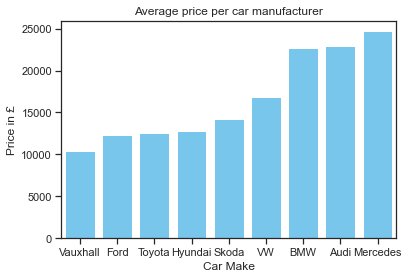

In [27]:
avg_price_per_make = pd.Series(cars.groupby('make')['price'].mean())
avg_price_per_make = avg_price_per_make.sort_values()

g = sns.barplot(data=avg_price_per_make, x=avg_price_per_make.index, y=avg_price_per_make.values, color="#66CCFF")

g.set(xticklabels=avg_price_per_make.index)
plt.xlabel("Car Make")
plt.ylabel("Price in £")
plt.title('Average price per car manufacturer')
plt.show()

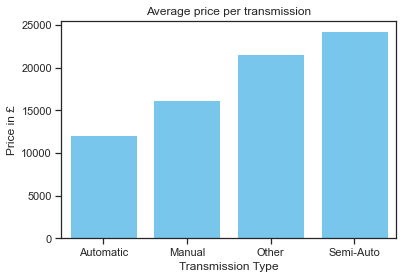

In [28]:
avg_price_tr = pd.Series(cars.groupby('transmission')['price'].mean())

g = sns.barplot(data=avg_price_tr, x=avg_price_tr.index, y=avg_price_tr.values, color="#66CCFF")

g.set(xticklabels=avg_price_tr.index)
plt.xlabel("Transmission Type")
plt.ylabel("Price in £")
plt.title('Average price per transmission')
plt.show()

In [74]:
cars['m_binned'] = pd.cut(cars['mileage'], bins=list(range(0, 120000, 10000)))
cars['a_binned'] = pd.cut(cars['age'], bins=list(range(0, 24, 2)))

cars_pivot = cars.pivot_table(
        values='price', 
        index='m_binned', 
        columns='a_binned', 
        aggfunc=np.mean)
cars_pivot.sort_index(ascending=False, inplace=True)


#cars_pivot.interpolate(method='linear', inplace=True, axis=1)
#cars_pivot.interpolate(method='linear', inplace=True, axis=0)


cars_pivot

a_binned,"(0, 2]","(2, 4]","(4, 6]","(6, 8]","(8, 10]","(10, 12]","(12, 14]","(14, 16]","(16, 18]","(18, 20]","(20, 22]"
m_binned,,,,,,,,,,,
"(100000, 110000]",NaN,NaN,9329.691176,9176.086957,6651.972973,4909.024390,3189.394737,3443.034483,2695.666667,2031.100000,1495.000000
"(90000, 100000]",NaN,NaN,10591.595238,10009.172662,7787.838710,5633.845070,3858.629032,3024.371429,2127.727273,2200.166667,2399.666667
"(80000, 90000]",NaN,20250.000000,11391.697211,9972.922034,8196.103261,5513.171717,3775.876923,3496.323529,3591.526316,1652.375000,2179.666667
"(70000, 80000]",NaN,15678.400000,12305.483871,10116.322702,8103.017595,6156.587302,4292.227273,3651.735294,3740.333333,4593.833333,899.000000
"(60000, 70000]",NaN,15719.133333,12884.029830,10628.167224,8274.732919,6014.252101,5207.615385,4135.611111,3377.250000,5325.000000,5450.833333
"(50000, 60000]",NaN,14923.777778,13218.317708,10930.675570,8460.401695,6274.717172,5667.642857,4061.933333,7108.428571,3206.750000,5470.000000
"(40000, 50000]",NaN,15580.615789,14022.253714,11160.850702,8705.058347,6479.449275,4913.592593,4016.900000,6212.500000,9742.500000,2691.333333
"(30000, 40000]",NaN,14726.547967,14090.349334,11484.509544,8595.978903,7467.142857,4702.454545,9394.714286,3873.714286,11482.666667,NaN
"(20000, 30000]",21983.000000,16357.850977,14258.500755,11310.687529,8422.755474,7482.545455,4160.600000,3495.000000,4689.000000,4540.000000,7847.500000


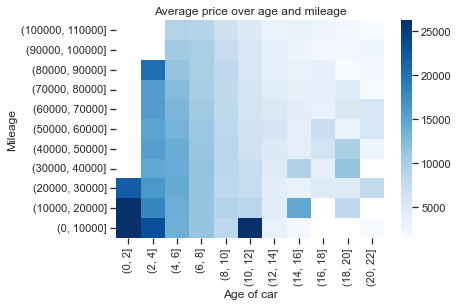

In [75]:
sns.heatmap(cars_pivot, robust=True, cmap="Blues")

plt.ylabel('Mileage')
plt.xlabel('Age of car')
plt.title('Average price over age and mileage')
plt.show()

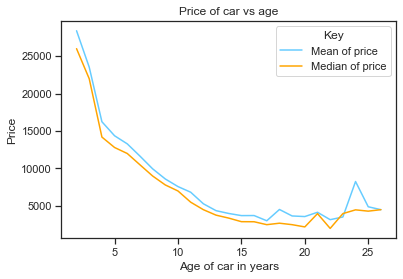

In [87]:
grp = cars[cars['age'] < 30]
mean_price = grp.groupby('age')[['age', 'price']].mean()
med_price = grp.groupby('age')[['age', 'price']].median()

mean_price['Key'] = 'Mean of price'
med_price['Key'] = 'Median of price'

sns.lineplot(data=mean_price, x='age', y='price', hue='Key', palette=["#66CCFF"])
sns.lineplot(data=med_price, x='age', y='price', hue='Key', palette=['orange'])

plt.xlabel('Age of car in years')
plt.ylabel('Price')
plt.title('Price of car vs age')
plt.show()

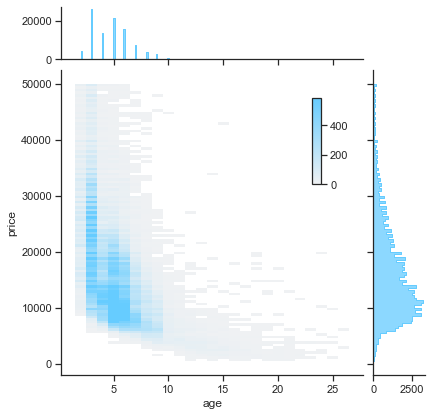

In [77]:
# DAVIDS AS CARS

age_price = cars[(cars['price'] < 50000) & (cars['age'] < 30)]

sns.set_theme(style="ticks")

g = sns.JointGrid(data=age_price, x="age", y="price", marginal_ticks=True)

# Set a log scaling on the y axis
#g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.7, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#66CCFF", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#66CCFF")

plt.show()

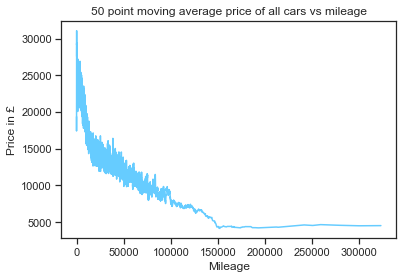

In [78]:
grp = cars.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=50, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title('50 point moving average price of all cars vs mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()

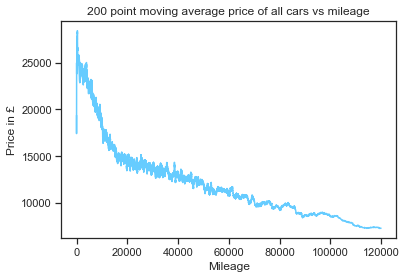

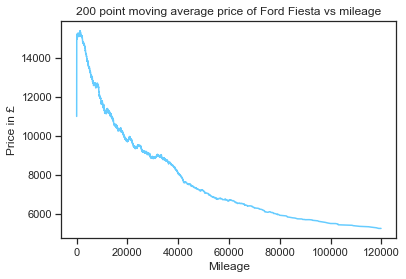

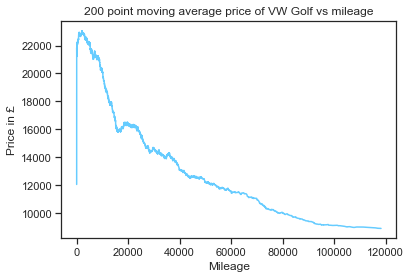

In [80]:
avg_width = 200

grp = cars[cars['mileage'] < 120000]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title(str(avg_width) + ' point moving average price of all cars vs mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()



grp = cars[(cars['model'] == 'Fiesta') & (cars['mileage'] < 120000)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title(str(avg_width) + ' point moving average price of Ford Fiesta vs mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()



grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < 120000)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title(str(avg_width) + ' point moving average price of VW Golf vs mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()

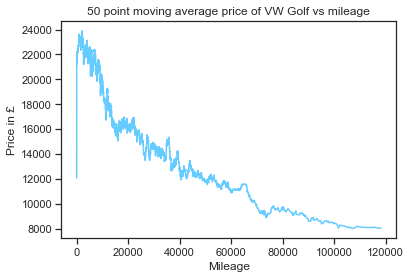

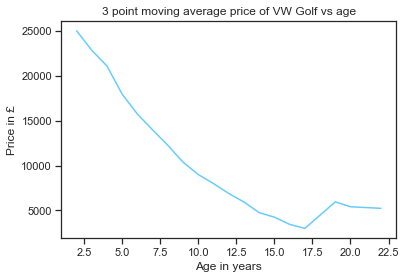

In [120]:
grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < 120000)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=50, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title('50 point moving average price of VW Golf vs mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()



grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < 120000)]
grp = grp.groupby('age')[['age', 'price']].mean()
grp['price'] = grp['price'].rolling(window=3, min_periods=1).mean()

sns.lineplot(data=grp, x='age', y='price', color="#66CCFF")

plt.title('3 point moving average price of VW Golf vs age')
plt.xlabel('Age in years')
plt.ylabel('Price in £')
plt.show()